## Unscented Kalman Filter 

### Results

Let's plot the results of the implemented UKF on the datasets 1 and 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline 

In [2]:
DATA1 = './src/dataset1_out.txt'
DATA2 = './src/dataset2_out.txt'

In [3]:
df1 = pd.read_table(DATA1, sep='\t')
df2 = pd.read_table(DATA2, sep='\t')

In [4]:
df1.head()

,px,py,v,yaw_angle,yaw_rate,px_measured,py_measured,px_true,py_true,vx_true,vy_true,NIS
0,8.46292,0.243462,3.040350,0.000000,0.000000,8.46292,0.243462,8.60,0.25,-3.00029,0.0,6.953230e-310
1,8.44893,0.251376,1.365780,-0.006885,0.000030,8.44818,0.251553,8.45,0.25,-3.00027,0.0,4.020090e-03
2,8.47151,0.249398,0.498960,0.010323,-0.000442,8.56759,0.241943,8.45,0.25,0.00000,0.0,1.312900e-01
3,8.47319,0.249931,0.473179,-0.002199,0.000432,8.45582,0.253997,8.45,0.25,0.00000,0.0,2.619880e-02
4,8.33942,0.249034,-1.351060,-0.014557,0.003312,8.42544,0.254042,8.35,0.25,-1.81979,0.0,7.194970e+00


In [5]:
df2.head()

,px,py,v,yaw_angle,yaw_rate,px_measured,py_measured,px_true,py_true,vx_true,vy_true,NIS
0,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,6.953270e-310
1,0.045151,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.765220e+00
2,1.559410,-0.135454,1.51412,8.326670e-17,1.865360e-35,1.55945,-0.138501,2.09897,0.052223,2.19595,0.109339,2.105220e-02
3,1.633950,0.020458,2.01796,-5.261390e-02,-3.309730e-02,1.81209,0.047483,2.09897,0.052223,2.19595,0.109339,2.965570e+00
4,3.880480,-0.130005,2.46215,-1.662870e-01,-1.127580e-01,3.89093,-0.134166,4.29136,0.215312,2.28434,0.226323,8.217070e-01


In [6]:
print('Length: dataset1', len(df1))
print('Length: dataset2', len(df2))

Length: dataset1 1224
Length: dataset2 200


In [7]:
# RMSE output for datasets 1 and 2
RMSE1 = './src/rmse1.txt'
RMSE2 = './src/rmse2.txt'

rmse_d1 = {}
rmse_d2 = {}
rdata = []
with open(RMSE1, 'r') as f:
    rdata = f.read()
    rdata = rdata.split('\n')
    rmse_d1['px'] = rdata[2].lstrip()  # start reading from the 3rd line from top
    rmse_d1['py'] = rdata[3].lstrip()
    rmse_d1['vx'] = rdata[4].lstrip()
    rmse_d1['vy'] = rdata[5].lstrip()
    
rdata = []
with open(RMSE2, 'r') as g:
    rdata = g.read()
    rdata = rdata.split('\n')
    rmse_d2['px'] = rdata[2].lstrip() # start reading from the 3rd line from top
    rmse_d2['py'] = rdata[3].lstrip()
    rmse_d2['vx'] = rdata[4].lstrip()
    rmse_d2['vy'] = rdata[5].lstrip()

In [8]:
# UKF params
paramlist = []
for line in rdata:
    if '=' not in line:
        continue
    paramlist.append(line)

In [9]:
paramlist

['σ(a)=1',
 'σ(yawdd)=0.59',
 'σ(laspx)=0.15',
 'σ(laspy)=0.15',
 'σ(radar_rho)=0.3',
 'σ(radar_phi)=0.03',
 'σ(radar_rhodot)=0.3']

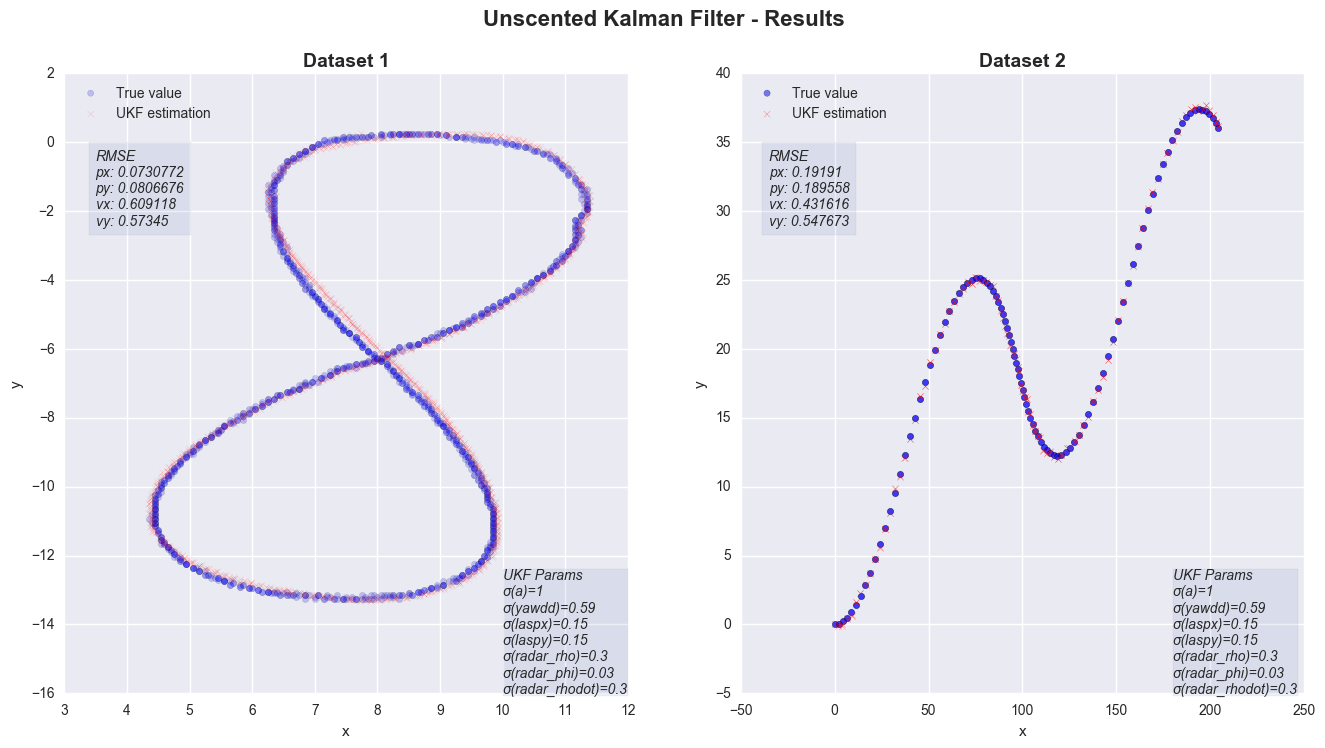

In [10]:
fig = plt.figure(figsize=(16,8))
fig.suptitle('Unscented Kalman Filter - Results', fontsize=16, fontweight='bold')

### Dataset 1 -----------------------------
ax = fig.add_subplot(121)

ax.set_title('Dataset 1', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')

# show px, py and true values
ax.scatter(df1["px_true"], df1["py_true"], alpha=0.2, label="True value")
ax.scatter(df1["px"], df1["py"], alpha=0.2, marker='x',c='r', label="UKF estimation")
ax.legend(loc='upper left')

# show RMSE1
rms_txt1 = 'RMSE\n' + \
            'px: ' + rmse_d1['px'] + '\n' + \
            'py: ' + rmse_d1['py'] + '\n' + \
            'vx: ' + rmse_d1['vx'] + '\n' + \
            'vy: ' + rmse_d1['vy']
ax.text(3.5, -2.4, rms_txt1, style='italic', bbox={'alpha': 0.1, 'pad': 5})

# STD params
P = 'UKF Params\n' + '\n'.join(paramlist)
ax.text(10, -16, P, style='italic', bbox={'alpha': 0.1, 'pad': 0})

### Dataset 2 -----------------------------
ax = fig.add_subplot(122)

ax.set_title('Dataset 2', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')

# show px, py and true values
ax.scatter(df2["px_true"], df2["py_true"], alpha=0.5, label="True value")
ax.scatter(df2["px"], df2["py"], alpha=0.5, marker='x', c='r', label="UKF estimation")
ax.legend(loc='upper left')

# show RMSE2 
rms_txt2 = 'RMSE\n' + \
            'px: ' + rmse_d2['px'] + '\n' + \
            'py: ' + rmse_d2['py'] + '\n' + \
            'vx: ' + rmse_d2['vx'] + '\n' + \
            'vy: ' + rmse_d2['vy']
ax.text(-35, 29, rms_txt2, style='italic', bbox={'alpha': 0.1, 'pad': 5})

# STD params
P = 'UKF Params\n' + '\n'.join(paramlist)
ax.text(180, -5, P, style='italic', bbox={'alpha': 0.1, 'pad': 0})


#plt.show()
plt.savefig('./images/results_vis.png')


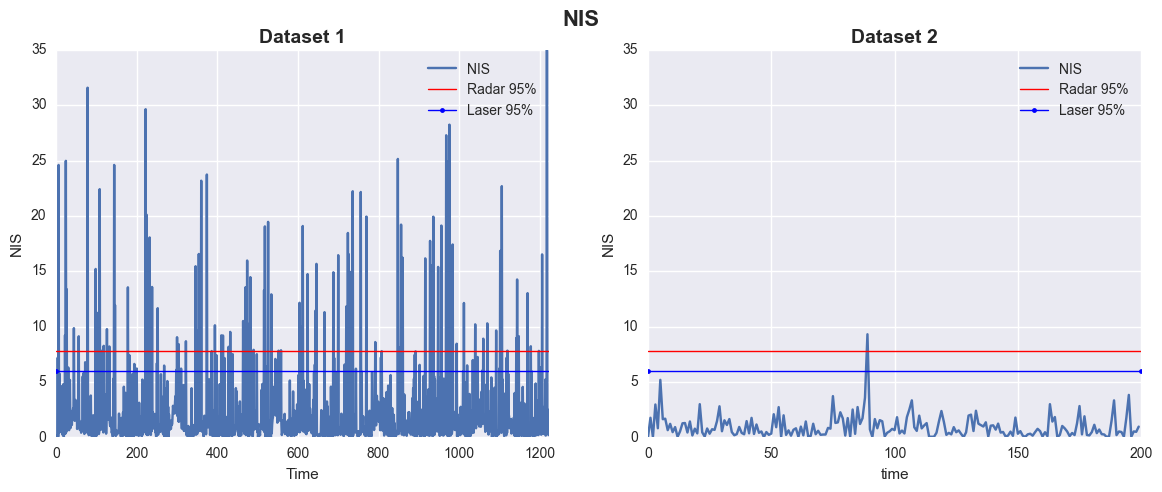

In [11]:
## show NIS

fig = plt.figure(figsize=(14, 5))
fig.suptitle('NIS', fontsize=16, fontweight='bold')

ax = fig.add_subplot(121)

ax.set_title('Dataset 1', fontsize=14, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('NIS')

ax.plot(df1['NIS'])
ax.plot((0, 1400), (7.8, 7.8), 'r-', linewidth=1, label = 'Radar 95%')
ax.plot((0, 1400), (5.99, 5.99), 'b.-', linewidth=1, label = 'Laser 95%')
ax.legend(loc='upper right')
ax.axis([0, 1224 , 0, 35])

ax = fig.add_subplot(122)

ax.set_title('Dataset 2', fontsize=14, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('NIS')

ax.plot(df2['NIS'])
ax.plot((0, 200), (7.8, 7.8), 'r-', linewidth=1, label = 'Radar 95%')
ax.plot((0, 200), (5.99, 5.99), 'b.-', linewidth=1, label = 'Laser 95%')
ax.legend(loc='upper right')
ax.axis([0, 200 , 0, 35])

#plt.show()
plt.savefig('./images/nis_vis.png')